In [13]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [14]:
path = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/shap_map_csv"
file = "shap_map_transformer.csv"

In [15]:
df = pd.read_csv(f"{path}/{file}")
df.rename(columns={"x": "lat", "y": "lon"}, inplace=True)

feature_names = [col for col in df.columns if col not in ["lon", "lat"]]
dropdown = widgets.Dropdown(
    options=feature_names,
    value=feature_names[0],
    description='SHAP Feature:'
)

def plot_feature_map(feature_name):
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set extent basierend auf Longitude (x) und Latitude (y)
    ax.set_extent([
        df["lon"].min() - 1, df["lon"].max() + 1,
        df["lat"].min() - 1, df["lat"].max() + 1
    ], crs=ccrs.PlateCarree())

    # Basemap
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

    # Scatterplot
    sc = ax.scatter(df["lon"], df["lat"], c=df[feature_name], cmap='viridis',
                    s=5, alpha=0.8, transform=ccrs.PlateCarree())

    # Colorbar
    cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cb.set_label(f'SHAP: {feature_name}')

    plt.title(f"SHAP Values for '{feature_name}' - MLP")
    plt.show()
widgets.interact(plot_feature_map, feature_name=dropdown);

interactive(children=(Dropdown(description='SHAP Feature:', options=('d2m', 'dem', 'lai', 'lc_agriculture', 'l…

In [11]:
def plot_shap_geopandas(df, shap_column, title="SHAP Map", cmap="viridis"):
    """
    df: Pandas DataFrame mit Spalten 'lat', 'lon' und dem SHAP-Feature
    shap_column: Name der Spalte mit SHAP-Werten (z. B. 'wind_speed')
    """
    # Erstelle GeoDataFrame mit Punkten aus lat/lon
    gdf = gpd.GeoDataFrame(df,
                           geometry=gpd.points_from_xy(df['lon'], df['lat']),
                           crs="EPSG:4326")  # WGS84
    # Reprojiziere in Web-Mercator (für Hintergrundkarten wie OpenStreetMap)
    gdf = gdf.to_crs(epsg=3857)

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, column=shap_column, cmap=cmap, legend=True, markersize=10, alpha=0.8)

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)

    ax.set_axis_off()
    ax.set_title(f"SHAP Values for {shap_column}", fontsize=14)
    plt.tight_layout()
    plt.show()


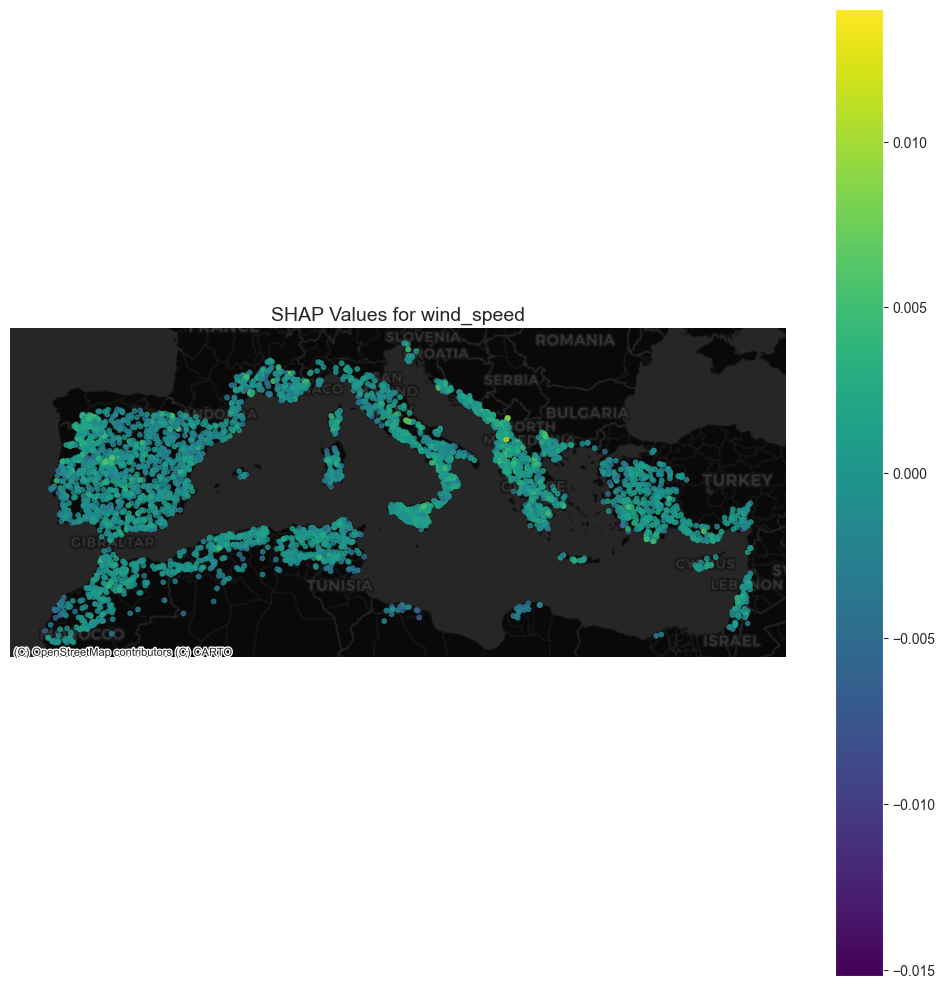

In [12]:
df = pd.read_csv(f"{path}/{file}")
df.rename(columns={"x": "lat", "y": "lon"}, inplace=True)
plot_shap_geopandas(df, shap_column="wind_speed", title="SHAP für wind_speed")